### <font color=red> Q3 </font>

This project investigates the relationship between gender and the category of traffic violations using the Traffic Violations Dataset. By analyzing this dataset, we aim to understand if there is a significant correlation between the gender of violators and the types of violations committed. The analysis includes calculating correlation coefficients, creating visualizations, and summarizing the data using pivot tables to draw meaningful conclusions.

Among developing this python code , I faced an error raised by midtake I have made in the 'driver_gender'column name. For this you will notice that some code may types twice, but even withis mestak, the code work done, so i prefer to keep this for future codsiderations.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv(r"C:\Users\galam\OneDrive\Desktop\GhadaALamoudi-TMA351\data\traffic_violaions.csv")


In [2]:
# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB
None


In [3]:
# Load the dataset
file_path = r"C:\Users\galam\OneDrive\Desktop\GhadaALamoudi-TMA351\data\traffic_violaions.csv"
df = pd.read_csv(file_path)

# Check the columns present in the DataFrame
print("Columns in the dataset:")
print(df.columns)

# Ensure 'driver_gender' and 'Category of violation' are in the DataFrame
if 'driver_gender' in df.columns and 'Category of violation' in df.columns:
    # Create a crosstab of driver_gender and category of violation
    crosstab = pd.crosstab(df['driver_gender'], df['Category of violation'])
    print(crosstab)
    
    # Perform Chi-Square test
    chi2, p, dof, ex = chi2_contingency(crosstab)
    print(f"Chi-Square test statistic: {chi2}")
    print(f"P-value: {p}")
    
    # Check for significant correlation
    if p < 0.05:
        print("There is a significant correlation between gender and category of violation.")
    else:
        print("There is no significant correlation between gender and category of violation.")
else:
    print("Column names 'driver_gender' or 'Category of violation' not found in the dataset.")


Columns in the dataset:
Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')
Column names 'driver_gender' or 'Category of violation' not found in the dataset.


In [4]:
# Load the dataset
file_path = r"C:\Users\galam\OneDrive\Desktop\GhadaALamoudi-TMA351\data\traffic_violaions.csv"
df = pd.read_csv(file_path)

# Check the columns present in the DataFrame
print("Columns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')


In [5]:
# Drop rows where 'driver_gender' or 'violation' is NaN for clean data
cleaned_df = df.dropna(subset=['driver_gender', 'violation'])

# Create a pivot table for summary
pivot = cleaned_df.pivot_table(values='stop_date', index='driver_gender', columns='violation', aggfunc='size', fill_value=0)
print(pivot)



violation      Equipment  Moving violation  Other  Registration/plates  \
driver_gender                                                            
F                    855              1390    354                  504   
M                   3421              6995   2607                 1316   

violation      Speeding  
driver_gender            
F                  9913  
M                 22225  


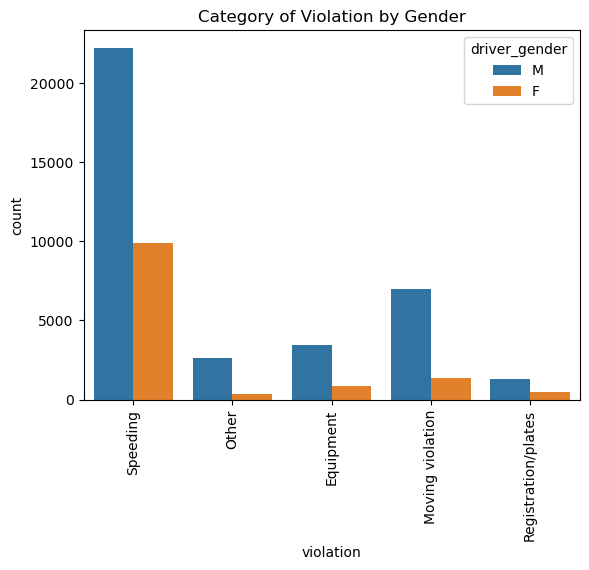

In [6]:
# Plotting - countplot
sns.countplot(data=df, x='violation', hue='driver_gender')
plt.title('Category of Violation by Gender')
plt.xticks(rotation=90)
plt.show()


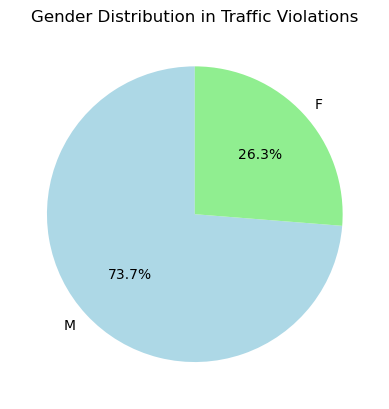

In [7]:
# Pie chart for gender distribution
gender_distribution = df['driver_gender'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Gender Distribution in Traffic Violations')
plt.ylabel('')
plt.show()
